In [32]:
import os
from collections import Counter
from pprint import pprint
import pandas as pd
import numpy as np

In [33]:
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [34]:
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.tree import export_graphviz
import graphviz

In [35]:
df = pd.read_csv('Ml project dataset.csv')

In [36]:
print(df.columns)


Index(['CB_Effective_Denisty', 'VB_Effective_Denisty', 'Electron mobility',
       'Hole mobility', 'Electron Affinity', 'Bandgap',
       'Dielectric permittivity', 'eta (%)                      ',
       'Voc (V)                      ', 'Jsc (mA/cm2)                 ',
       'FF (%)                       '],
      dtype='object')


In [37]:
df.columns = df.columns.str.strip()

In [38]:
print(df.columns)


Index(['CB_Effective_Denisty', 'VB_Effective_Denisty', 'Electron mobility',
       'Hole mobility', 'Electron Affinity', 'Bandgap',
       'Dielectric permittivity', 'eta (%)', 'Voc (V)', 'Jsc (mA/cm2)',
       'FF (%)'],
      dtype='object')


In [39]:
x = df[['CB_Effective_Denisty', 'VB_Effective_Denisty', 'Electron mobility', 'Hole mobility', 'Electron Affinity', 'Bandgap', 'Dielectric permittivity']]
# 'Voc (V)', 'Jsc (mA/cm2)', 'FF (%)'

In [40]:
y = df['eta (%)']

In [41]:
x

,CB_Effective_Denisty,VB_Effective_Denisty,Electron mobility,Hole mobility,Electron Affinity,Bandgap,Dielectric permittivity
0,1.000000e+18,1.200000e+18,1.5,1.5,3.65,1.75,3.00
1,1.000000e+18,1.200000e+18,1.5,1.5,3.65,1.75,4.33
2,1.000000e+18,1.200000e+18,1.5,1.5,3.65,1.75,5.67
3,1.000000e+18,1.200000e+18,1.5,1.5,3.65,1.75,7.00
4,1.000000e+18,1.200000e+18,1.5,1.5,3.65,1.77,3.00
...,...,...,...,...,...,...,...
3883,2.000000e+19,5.000000e+19,5.0,5.0,3.80,1.78,7.00
3884,2.000000e+19,5.000000e+19,5.0,5.0,3.80,1.80,3.00
3885,2.000000e+19,5.000000e+19,5.0,5.0,3.80,1.80,4.33
3886,2.000000e+19,5.000000e+19,5.0,5.0,3.80,1.80,5.67


In [42]:
y

0       18.9
1       18.8
2       18.7
3       18.6
4       18.6
        ... 
3883    16.0
3884    15.5
3885    15.5
3886    15.5
3887    15.5
Name: eta (%), Length: 3888, dtype: float64

In [43]:
corr = df.drop(columns=['Voc (V)', 'Jsc (mA/cm2)', 'FF (%)']).corr()
corr.iloc[:7,7].sort_values(ascending=False)


Hole mobility             -0.000852
Electron mobility         -0.055344
VB_Effective_Denisty      -0.151384
Dielectric permittivity   -0.163282
CB_Effective_Denisty      -0.230179
Bandgap                   -0.566083
Electron Affinity         -0.622471
Name: eta (%), dtype: float64

In [44]:
corr = corr.abs()
cor = corr.iloc[:7,7].sort_values(ascending=False)

In [45]:
cor.column = ['p', 'n']
print(cor)

Electron Affinity          0.622471
Bandgap                    0.566083
CB_Effective_Denisty       0.230179
Dielectric permittivity    0.163282
VB_Effective_Denisty       0.151384
Electron mobility          0.055344
Hole mobility              0.000852
Name: eta (%), dtype: float64


In [46]:
test_fraction = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_fraction, random_state=42)

In [47]:
# Instantiate the RandomForestRegressor
Default_model = RandomForestRegressor(random_state=1, n_estimators=1, bootstrap=True)

# Fit the model to the training data
Default_model.fit(x_train, y_train)

# Print completion message
print('Model training complete.')

# Print tree depth
tree_depths = [estimator.tree_.max_depth for estimator in Default_model.estimators_]
print('Tree depths:', tree_depths)

# Print feature importances
feature_importances = Default_model.feature_importances_
print('Feature importances:', feature_importances)

# If you want to print feature importances per tree, you can do:
for i, estimator in enumerate(Default_model.estimators_):
    print(f'Tree {i+1} feature importances:', estimator.feature_importances_)

Model training complete.
Tree depths: [15]
Feature importances: [1.01579035e-01 8.40075654e-02 1.85056419e-02 2.36326907e-04
 4.08505548e-01 3.40671929e-01 4.64939542e-02]
Tree 1 feature importances: [1.01579035e-01 8.40075654e-02 1.85056419e-02 2.36326907e-04
 4.08505548e-01 3.40671929e-01 4.64939542e-02]


In [48]:
# Make predictions on training and testing data
Train_predictions = Default_model.predict(x_train)
Test_predictions = Default_model.predict(x_test)

# Define evaluation metrics
def rmse(y_true, y_predictions):
    return round(np.sqrt(metrics.mean_squared_error(y_true, y_predictions)), 3)

def rmse_std(y_true, y_predictions):
    return round(rmse(y_true, y_predictions) / np.std(y_true), 3)

def mae(y_true, y_predictions):
    return round(metrics.mean_absolute_error(y_true, y_predictions), 3)

def r2(y_true, y_predictions):
    return round(metrics.r2_score(y_true, y_predictions), 3)

# Function to generate parity statistics
def parity_stats(y_left_true, y_left_predictions, y_right_true, y_right_predictions):
    rmse_left = rmse(y_left_true, y_left_predictions)
    rmse_std_left = rmse_std(y_left_true, y_left_predictions)
    mae_left = mae(y_left_true, y_left_predictions)
    r2_left = r2(y_left_true, y_left_predictions)
    
    rmse_right = rmse(y_right_true, y_right_predictions)
    rmse_std_right = rmse_std(y_right_true, y_right_predictions)
    mae_right = mae(y_right_true, y_right_predictions)
    r2_right = r2(y_right_true, y_right_predictions)
    
    stats_df = pd.DataFrame({
        'Error Metric': ['RMSE', 'RMSE/std', 'MAE', 'R2'],
        'Train': [str(rmse_left), rmse_std_left, mae_left, r2_left],
        'Test': [str(rmse_right), rmse_std_right, mae_right, r2_right],
        'Note': ['(0.0 for perfect prediction)', '(0.0 for perfect prediction)', '(0.0 for perfect prediction)', '(1.0 for perfect prediction)']
    })
    
    return stats_df

# Generate parity statistics
stats_df = parity_stats(y_train, Train_predictions, y_test, Test_predictions)
print(stats_df)

  Error Metric  Train   Test                          Note
0         RMSE  0.034  0.051  (0.0 for perfect prediction)
1     RMSE/std  0.044  0.067  (0.0 for perfect prediction)
2          MAE  0.008   0.02  (0.0 for perfect prediction)
3           R2  0.998  0.995  (1.0 for perfect prediction)


In [49]:
def parity_plots(y_left_true, y_left_predictions, y_right_true, y_right_predictions, title_left="Training", title_right="Test"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot for training data
    ax1.scatter(y_left_true, y_left_predictions, edgecolors=(0, 0, 0))
    ax1.plot([y_left_true.min(), y_left_true.max()], [y_left_true.min(), y_left_true.max()], 'k--', lw=2)
    ax1.legend(["Perfect Prediction", "Predictions"])
    ax1.set_xlabel('Actual Efficiency')
    ax1.set_ylabel('Predicted Efficiency')
    ax1.set_title(title_left)
    
    # Plot for test data
    ax2.scatter(y_right_true, y_right_predictions, edgecolors=(0, 0, 0))
    ax2.plot([y_right_true.min(), y_right_true.max()], [y_right_true.min(), y_right_true.max()], 'k--', lw=2)
    ax2.legend(["Perfect Prediction", "Predictions"])
    ax2.set_xlabel('Actual Efficiency')
    ax2.set_ylabel('Predicted Efficiency')
    ax2.set_title(title_right)
    
    plt.tight_layout()
    plt.savefig("parity.tiff", dpi=300)
    plt.show()

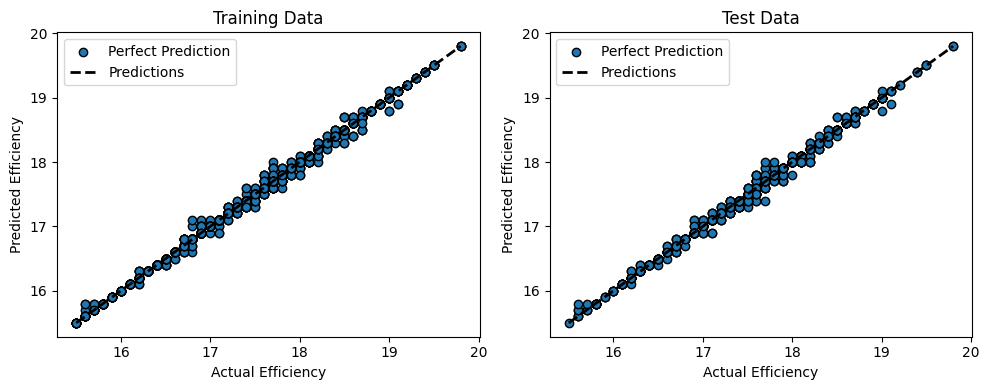

  Error Metric  Train   Test                          Note
0         RMSE  0.034  0.051  (0.0 for perfect prediction)
1     RMSE/std  0.044  0.067  (0.0 for perfect prediction)
2          MAE  0.008   0.02  (0.0 for perfect prediction)
3           R2  0.998  0.995  (1.0 for perfect prediction)


In [50]:
# Generate parity plots
parity_plots(y_train, Train_predictions, y_test, Test_predictions, title_left="Training Data", title_right="Test Data")

# Generate parity statistics
stats_df = parity_stats(y_train, Train_predictions, y_test, Test_predictions)
print(stats_df)

In [51]:
# Accuracy of the model on training and testing data
train_accuracy = Default_model.score(x_train, y_train)
test_accuracy = Default_model.score(x_test, y_test)

print('Accuracy on training data:', train_accuracy)
print('Accuracy on testing data:', test_accuracy)

# Function to print the average performance of models with the best hyperparameters during cross-validation
def CV_best_stats(CV, y_true):
    idx = CV.best_index_
    rmse = round(np.sqrt(-CV.cv_results_['mean_test_neg_mean_squared_error'][idx]), 4)
    rmse_std = round(rmse / np.std(y_true), 4)
    mae = round(-CV.cv_results_['mean_test_neg_mean_absolute_error'][idx], 4)
    r2 = round(CV.cv_results_['mean_test_r2'][idx], 4)
    
    print("Average test RMSE:", rmse, "(0.0 for perfect prediction)")
    print("Average test RMSE/std:", rmse_std, "(0.0 for perfect prediction)")
    print("Average test MAE:", mae, "(0.0 for perfect prediction)")
    print("Average test R2:", r2, "(1.0 for perfect prediction)")
    
    return rmse, rmse_std, mae, r2

Accuracy on training data: 0.9981475659144443
Accuracy on testing data: 0.995476983131462


In [52]:
# Define the hyperparameter dictionary
default_dict = {'n_estimators': [1]}

# Create GridSearchCV object
default_CV = GridSearchCV(Default_model, default_dict, return_train_score=True, 
                          scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], 
                          refit='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
default_CV = default_CV.fit(x_train, y_train)

# Get cross-validation statistics for the default model
default_CV_stats = CV_best_stats(default_CV, y_train)

Average test RMSE: 0.0801 (0.0 for perfect prediction)
Average test RMSE/std: 0.1026 (0.0 for perfect prediction)
Average test MAE: 0.036 (0.0 for perfect prediction)
Average test R2: 0.9894 (1.0 for perfect prediction)


In [53]:
# Define the k-fold cross-validator
kfold = RepeatedKFold(n_splits=10, random_state=1, n_repeats=10)

# Create a new GridSearchCV object with k-fold cross-validation
CV = GridSearchCV(Default_model, default_dict, cv=kfold, return_train_score=True, 
                  scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], 
                  refit='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
CV = CV.fit(x_train, y_train)


In [54]:

# Get cross-validation statistics for the optimized model
kfold_CV_stats = CV_best_stats(CV, y_train)

Average test RMSE: 0.0693 (0.0 for perfect prediction)
Average test RMSE/std: 0.0888 (0.0 for perfect prediction)
Average test MAE: 0.0291 (0.0 for perfect prediction)
Average test R2: 0.9921 (1.0 for perfect prediction)


In [55]:
corr.columns

Index(['CB_Effective_Denisty', 'VB_Effective_Denisty', 'Electron mobility',
       'Hole mobility', 'Electron Affinity', 'Bandgap',
       'Dielectric permittivity', 'eta (%)'],
      dtype='object')

In [56]:
im = pd.DataFrame({
    'Features': x_train.columns,
    'Importances': Default_model.feature_importances_
})

# Sort the DataFrame by 'Importances' in descending order
im = im.sort_values(by='Importances', ascending=False)

# Print the DataFrame
print(im)

                  Features  Importances
4        Electron Affinity     0.408506
5                  Bandgap     0.340672
0     CB_Effective_Denisty     0.101579
1     VB_Effective_Denisty     0.084008
6  Dielectric permittivity     0.046494
2        Electron mobility     0.018506
3            Hole mobility     0.000236


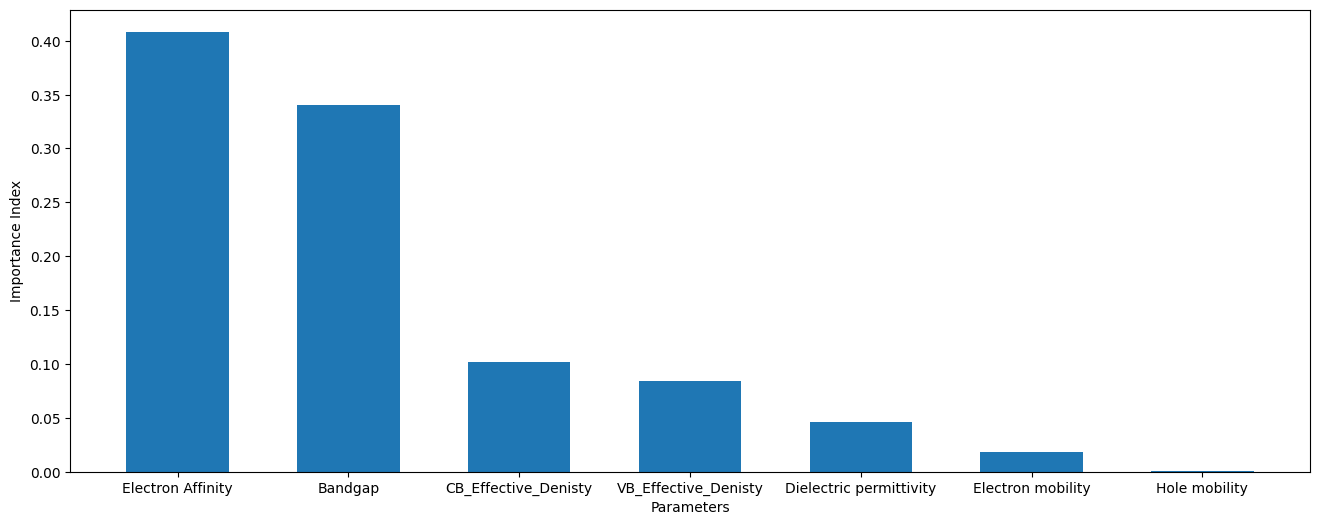

In [69]:
plt.figure(figsize=(16,6))
plt.bar(im['Features'], im['Importances'], width=0.6)
plt.xlabel('Parameters')
plt.ylabel('Importance Index')
plt.show
plt.savefig("Feature Importance.tiff",dpi=300)

In [70]:
X = x.drop(columns=['CB_Effective_Denisty', 'VB_Effective_Denisty', 'Electron mobility', 'Dielectric permittivity','Hole mobility' ])

In [71]:
new_df = pd.concat([X, df.iloc[:,7]], axis=1)
new_df

,Electron Affinity,Bandgap,eta (%)
0,3.65,1.75,18.9
1,3.65,1.75,18.8
2,3.65,1.75,18.7
3,3.65,1.75,18.6
4,3.65,1.77,18.6
...,...,...,...
3883,3.80,1.78,16.0
3884,3.80,1.80,15.5
3885,3.80,1.80,15.5
3886,3.80,1.80,15.5


In [73]:
new_df_clean = new_df.groupby(['Electron Affinity', 'Bandgap']).agg({'eta (%)': 'min'})
new_df_clean.columns = ['PCE_min']
new_df_clean = new_df_clean.reset_index()
new_df_clean


,Electron Affinity,Bandgap,PCE_min
0,3.65,1.75,17.9
1,3.65,1.77,17.7
2,3.65,1.78,17.4
3,3.65,1.80,16.8
4,3.73,1.75,17.4
5,3.73,1.77,17.1
6,3.73,1.78,16.8
7,3.73,1.80,16.1
8,3.80,1.75,16.5
9,3.80,1.77,16.3


In [74]:
output_path = "new_df_clean.csv"
new_df_clean.to_csv(output_path)

In [75]:
X = new_df_clean[['Electron Affinity', 'Bandgap']]
Y = new_df_clean['PCE_min']

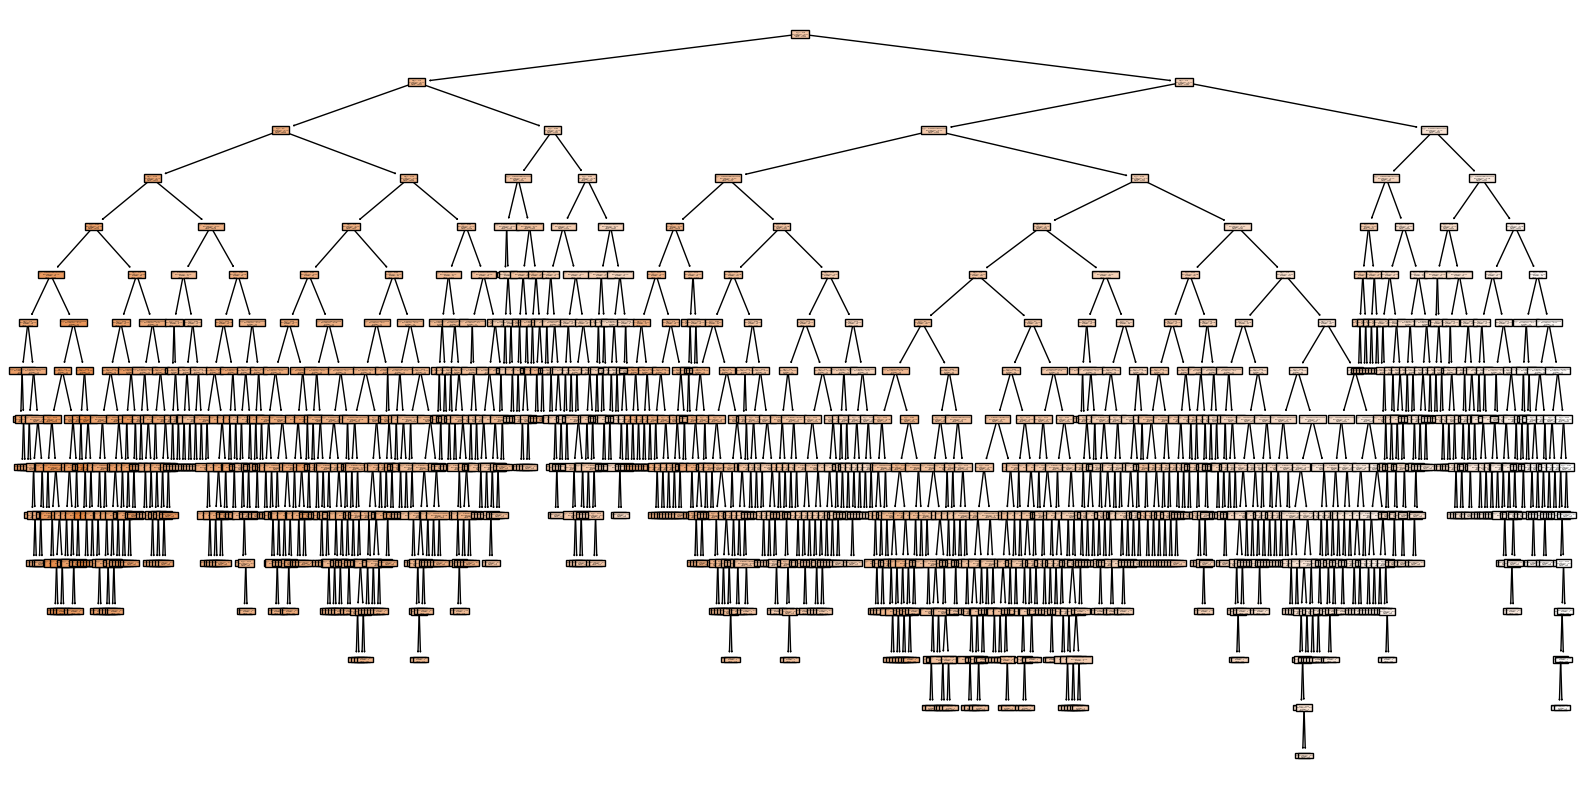

In [76]:
# Fit the RandomForestRegressor to the data
Default_model_tree = RandomForestRegressor(random_state=1, n_estimators=1, bootstrap=True)
Default_model_tree.fit(x_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))  # Adjust the size to a more reasonable value
tree.plot_tree(Default_model_tree.estimators_[0], filled=True)
plt.savefig("d-tree.pdf", dpi=600)
plt.show()

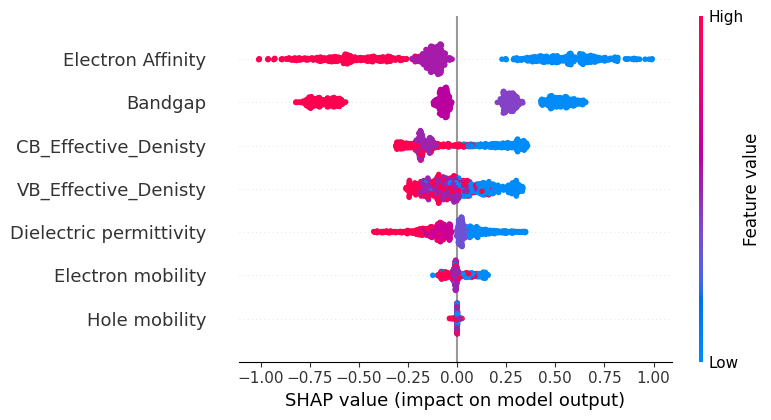

In [77]:
import shap

fig = plt.figure(figsize=(9,6))
explainer = shap.TreeExplainer(Default_model, x_test)
shap_vlaues = explainer.shap_values(x_test)
shap.summary_plot(shap_vlaues, x_test, show=False)
plt.savefig("rf.png", dpi = 600, bbox_inches='tight')